In [38]:
#Imports
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from astropy.table import Table

In [39]:
#Load TNG
#Illustris-3
basePath = 'D:/Buhv2020Work/illustris-100-1/output'
snapshot_ind = 99 #redshift ?

header = il.groupcat.loadHeader(basePath, snapshot_ind)
scale_factor = header['Time']

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)

subhalo_keys = (list(subhalo_grp.keys()))
halo_keys = (list(halo_grp.keys()))

subhalo_table = Table({'Index': [x+1 for x in range(subhalo_grp['count'])]})
for i in range(1, len(subhalo_keys)):
    subhalo_table.add_column(subhalo_grp[str(subhalo_keys[i])], name=str(subhalo_keys[i]))
    
halo_table = Table({'Index': [x+1 for x in range(halo_grp['count'])]})
for i in range(1, len(halo_keys)):
    halo_table.add_column(halo_grp[str(halo_keys[i])], name=str(halo_keys[i]))

#print(subhalo_table)
#print(halo_table)

In [87]:

#We start out by masking out halos with no subhalohalo_table['GroupFirstSub'])
#print(np.mean(halo_table['GroupNsubs']))
"""
table_cut = halo_table[halo_table['GroupNsubs']>100]
print(len(table_cut))
mass = np.array(np.log10(table_cut["GroupMass"]*1e10/0.704))
print(np.mean(mass))
plt.hist(mass, bins=100)
plt.show()
"""
"""
mass = np.array(np.log10(halo_table["GroupMass"]*1e10/0.704))
print(len(halo_table[mass>12.5]))
print(len(halo_table))
"""
print(len(halo_table))
print(len(halo_table[halo_table['GroupLenType'][:,4]<1]))

#plt.hist(halo_table['GroupLen'], bins=100)
#sorted = np.sort(halo_table['GroupLen'])
#print(sorted[0:130000])

#plt.hist(sorted[0:130000], bins=100)

6291349
6062362


In [70]:
#Applying basic subahlo cuts to remove junk data:
print(len(subhalo_table))

subhalo_table = subhalo_table[subhalo_table['SubhaloFlag']]
print(len(subhalo_table))
print('Subhalo flag mask complete\n')


subhalo_table = subhalo_table[subhalo_table['SubhaloMass']!=0]
print(len(subhalo_table))
print('Mass Mask complete\n')

subhalo_table = subhalo_table[subhalo_table['SubhaloMassType'][:,4]!=0]
print(len(subhalo_table))
print('Stellar Mass Mask complete \n')

mask = subhalo_table['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask[:,0]
for i in range (1,8):
    photo_mask = photo_mask & mask[:,i]
subhalo_table = subhalo_table[photo_mask]
print(len(subhalo_table))
print('Photo Mask complete \n\n')
pre_masscut = subhalo_table


327324
327324
Subhalo flag mask complete

327324
Mass Mask complete

327324
Stellar Mass Mask complete 

327324
Photo Mask complete 




D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


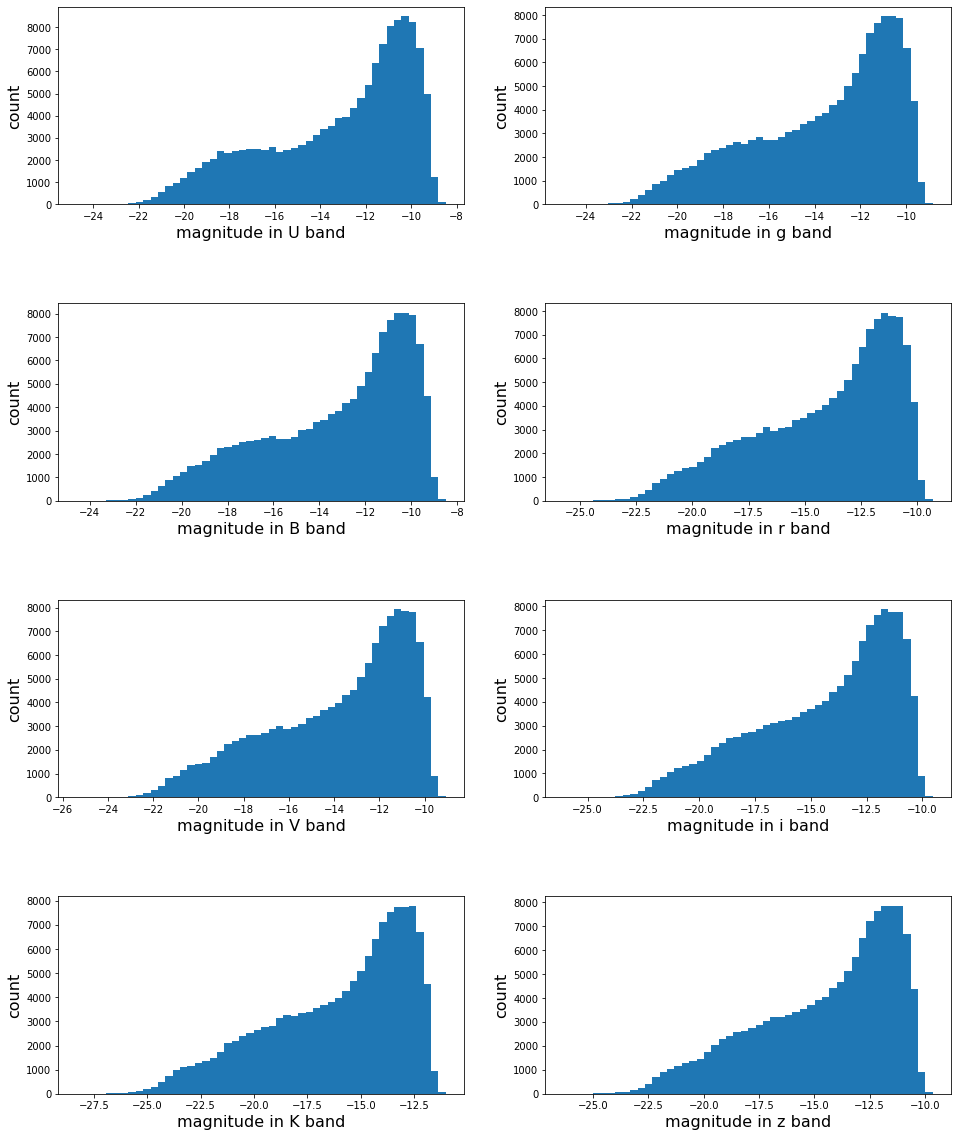

In [52]:
#Overall plot
subhalomass = np.array(np.log10(subhalo_table["SubhaloMassInHalfRad"]*1e10/0.704))
mask = subhalomass > 9
st = subhalo_table[mask]
#st = subhalo_table
fig, ax = plt.subplots(4,2)
fig.set_size_inches(16,20)
plt.subplots_adjust(hspace = 0.5)
band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
for bands in range(8):
    mag = st['SubhaloStellarPhotometrics'][:,bands]
    ax[bands%4][bands//4].hist(mag, bins=50)
    ax[bands%4][bands//4].set_xlabel('magnitude in ' + band_names[bands] + " band", fontsize = 16 )
    ax[bands%4][bands//4].set_ylabel('count', fontsize = 16)

plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


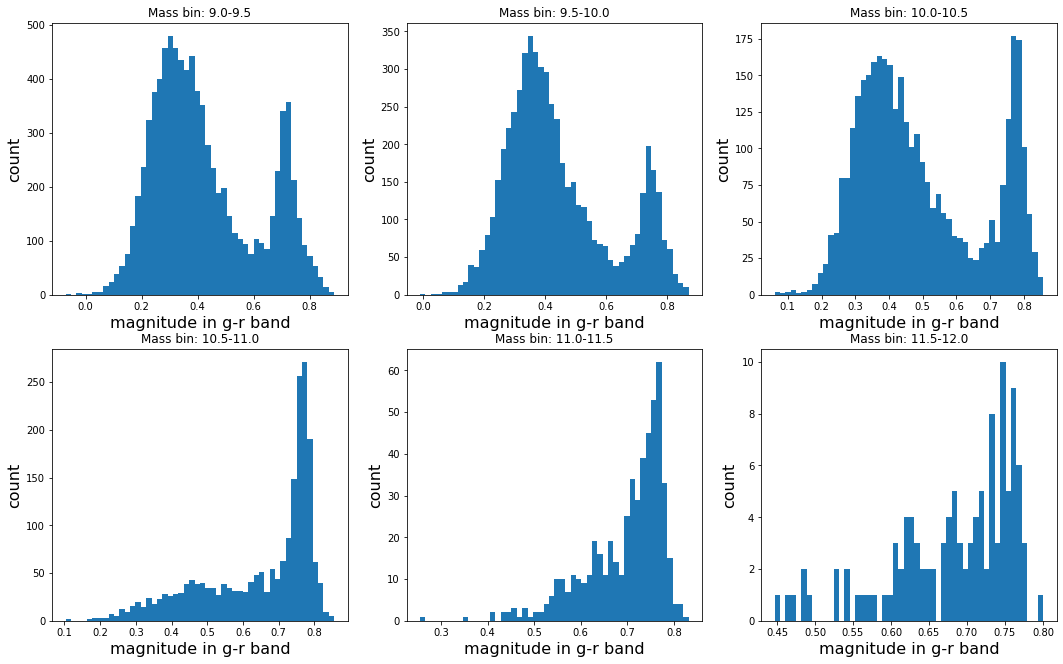

In [53]:
#G-R for different mass bins:
bins = [9.0,9.5,10.0,10.5,11.0,11.5,12.0]
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18,11)
for i in range(0,6):
    subhalomass = np.array(np.log10(subhalo_table["SubhaloMassType"]*1e10/0.704))
    mask1 = subhalomass[:,4] > bins[i]
    s1 = subhalo_table[mask1]
    
    subhalomass = np.array(np.log10(s1["SubhaloMassType"]*1e10/0.704))
    mask2 = subhalomass[:,4] < bins[i+1]
    s2 = s1[mask2]
    
    mag = s2['SubhaloStellarPhotometrics'][:,4] - s2['SubhaloStellarPhotometrics'][:,5]
    ax[i//3][i%3].hist(mag, bins=50) #, density=True)
    ax[i//3][i%3].set_title("Mass bin: "+str(bins[i])+"-"+str(bins[i+1]))
    ax[i//3][i%3].set_xlabel('magnitude in g-r band', fontsize = 16 )
    ax[i//3][i%3].set_ylabel('count', fontsize = 16)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


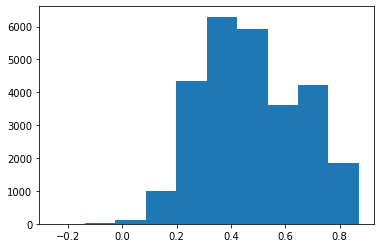

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 9.  ,  9.03,  9.06,  9.09,  9.12,  9.15,  9.18,  9.21,  9.24,
         9.27,  9.3 ,  9.33,  9.36,  9.39,  9.42,  9.45,  9.48,  9.51,
         9.54,  9.57,  9.6 ,  9.63,  9.66,  9.69,  9.72,  9.75,  9.78,
         9.81,  9.84,  9.87,  9.9 ,  9.93,  9.96,  9.99, 10.02, 10.05,
        10.08, 10.11, 10.14, 10.17, 10.2 , 10.23, 10.26, 10.29, 10.32,
        10.35, 10.38, 10.41, 10.44, 10.47, 10.5 , 10.53, 10.56, 10.59,
        10.62, 10.65, 10.68, 10.71, 10.74, 10.77, 10.8 , 10.83, 10.86,
        10.89, 10.92, 10.95, 10.98, 11.01, 11.04, 11.07, 11.1 , 11.13,
        11.16, 11.19, 11.22, 11.25, 11.28, 11.31, 11.34, 11.37, 11.4 ,
        11.43, 11.46, 11.49, 11.52, 11.55, 11.58, 11.61, 11.64, 11.67,
        11.7 , 11.73, 11.76, 11.79, 11.82

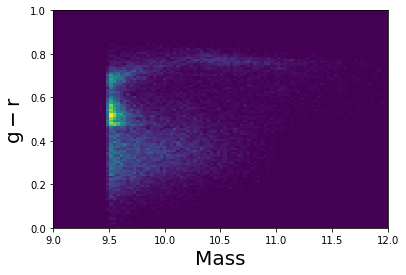

In [113]:
#Recreating Figure 3 from https://arxiv.org/pdf/1707.03395.pdf
masscut_nine = cut(pre_masscut, "SubhaloMassInHalfRad", 9.5)

mag = masscut_nine['SubhaloStellarPhotometrics'][:,4] - masscut_nine['SubhaloStellarPhotometrics'][:,5]
plt.hist(mag)
plt.show()

mass = np.array(np.log10(masscut_nine["SubhaloMassInHalfRad"]*1e10/0.704))
plt.ylabel("$\mathrm{g-r}$", fontsize = 20)
plt.xlabel("Mass", fontsize = 20)

#heights, mass_bins, mag_bins = np.histogram2d(mass, mag, bins=50)
#plt.contour(mass_bins[0:50],mag_bins[0:50], heights, colors=['red','orange','pink','green'])
plt.hist2d(mass, mag, bins=100, cmap='viridis', range=[[9,12], [0,1]])

In [ ]:
#Color-Color Plots
color_color_cut = cut(pre_masscut, 'SubhaloMassInHalfRad', 10)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)

color_color_cut = cut(pre_masscut, 'SubhaloMass', 10)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)


color_color_cut = cut(pre_masscut, 'SubhaloMassInHalfRad', 10.3)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)

color_color_cut = cut(pre_masscut, 'SubhaloMassInHalfRad', 11.3)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.5, 0.4)
"""
color_color_cut = cut(pre_masscut, 'SubhaloMass', 9)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)

#Color-Density Plots
density_cut = cut(pre_masscut, 'SubhaloMass', 9.5)
color_density(density_cut['SubhaloStellarPhotometrics'], 5, 5, 7)
color_density(density_cut['SubhaloStellarPhotometrics'], 5, 4, 5)
color_density(density_cut['SubhaloStellarPhotometrics'], 4, 4, 7)
color_density(density_cut['SubhaloStellarPhotometrics'], 6, 5, 6)
"""

In [41]:
def color_density(mag, band1, band2, band3, title):
    band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
    r = mag[:,band1]
    r_minus_z = mag[:,band2]-mag[:,band3]
    plt.figure(figsize=(8,6))
    plt.hist2d(r_minus_z, r, bins = 80, cmap='viridis')#, range=[[0, 0.7], [0, 0.8]])
    plt.xlabel(band_names[band2]+"-"+band_names[band3], fontsize = 20)
    plt.ylabel(band_names[band1], fontsize = 20)
    plt.title(title, fontsize = 20)
    plt.colorbar()

In [42]:
def color_color(mag, r1, r2):
    g_minus_r = mag[:,4]-mag[:,5]
    r_minus_z = mag[:,5]-mag[:,7]
    plt.figure(figsize=(12,10))
    #heights, rmz,gmr = np.histogram2d(r_minus_z,g_minus_r,bins=150)
    plt.hist2d(g_minus_r,r_minus_z, bins = 150, cmap='viridis', range=[[r1, 1], [r2, 1]], cmin = 0.1)
    plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
    plt.ylabel("$\mathrm{r-z}$", fontsize = 20)
    plt.title("Color-Color plane plot", fontsize = 20)
    plt.colorbar()
    plt.grid(b=True, which='both', axis='both')
    #print(len(g_minus_r))
    #print(str(len(g_minus_r[g_minus_r>0.5])) + "\n")
    #levels = np.linspace(0, 40,num=4)
    #plt.contour(gmr[0:150],rmz[0:150], heights, levels=levels, 
                #extent=[0,0,0.8,0.7], colors=['red','orange','pink','green'])

In [43]:
def cut(table, field, num):
    subhalomass = np.array(np.log10(table[field]*1e10/0.704))
    mask = subhalomass > num
    return table[mask]

In [44]:
#Select Color Cuts for blue
mag = subhalo_table['SubhaloStellarPhotometrics']
#Cutting for blue
gmr_cut_low = (mag[:,4]-mag[:,5])>0.46
rmz_cut_high = (mag[:,5]-mag[:,7])<0.34
subhalo_table_blue = subhalo_table[gmr_cut_low & rmz_cut_high]
#subhalomass = np.array(np.log10(subhalo_table_blue["SubhaloMassInHalfRad"]*1e10/0.704))
#blue_cut_mass=subhalo_table_blue[subhalomass>9]

#Cutting for red
gmr_cut_low = (mag[:,4]-mag[:,5])>0.66
rmz_cut_low = (mag[:,5]-mag[:,7])>0.52
subhalo_table_red = subhalo_table[gmr_cut_low & rmz_cut_low]
#subhalomass = np.array(np.log10(subhalo_table_red["SubhaloMassInHalfRad"]*1e10/0.704))
#red_cut_mass=subhalo_table_red[subhalomass>9]

In [45]:
print(len(blue_cut_mass))
print(len(red_cut_mass))

18112
8379


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


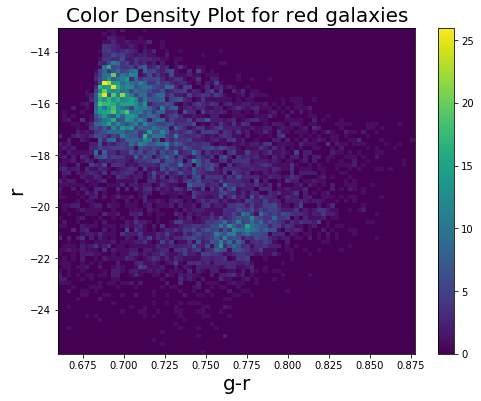

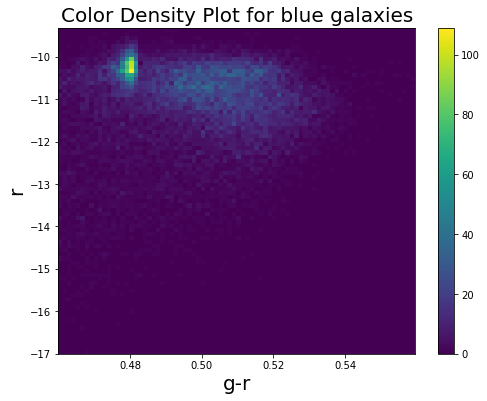

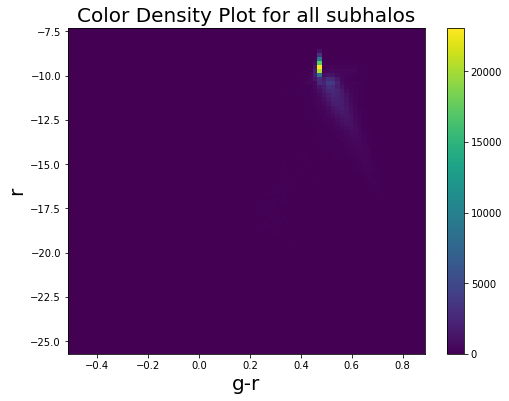

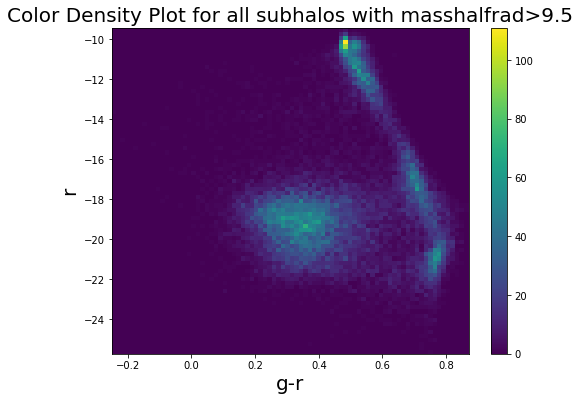

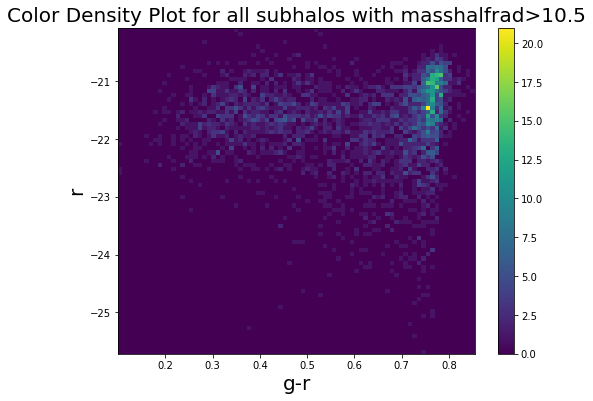

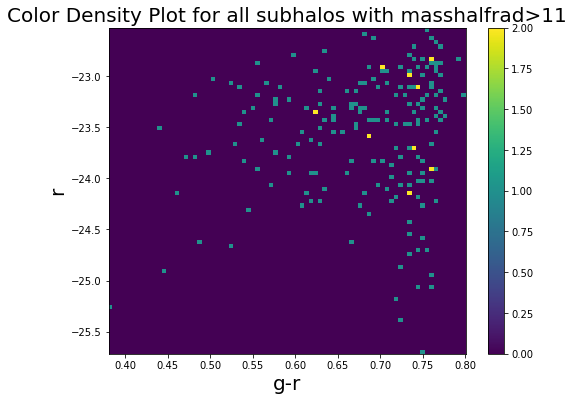

In [46]:
color_density(red_cut_mass['SubhaloStellarPhotometrics'], 5, 4, 5, "Color Density Plot for red galaxies")
color_density(blue_cut_mass['SubhaloStellarPhotometrics'], 5, 4, 5, "Color Density Plot for blue galaxies")
color_density(pre_masscut['SubhaloStellarPhotometrics'], 
              5, 4, 5, "Color Density Plot for all subhalos")

color_density(cut(pre_masscut, 'SubhaloMassInHalfRad', 9.5)['SubhaloStellarPhotometrics'], 
              5, 4, 5, "Color Density Plot for all subhalos with masshalfrad>9.5")

color_density(cut(pre_masscut, 'SubhaloMassInHalfRad', 10.5)['SubhaloStellarPhotometrics'], 
              5, 4, 5, "Color Density Plot for all subhalos with masshalfrad>10.5")

color_density(cut(pre_masscut, 'SubhaloMassInHalfRad', 11.5)['SubhaloStellarPhotometrics'], 
              5, 4, 5, "Color Density Plot for all subhalos with masshalfrad>11")


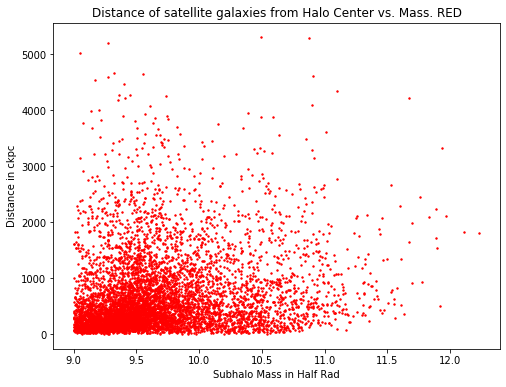

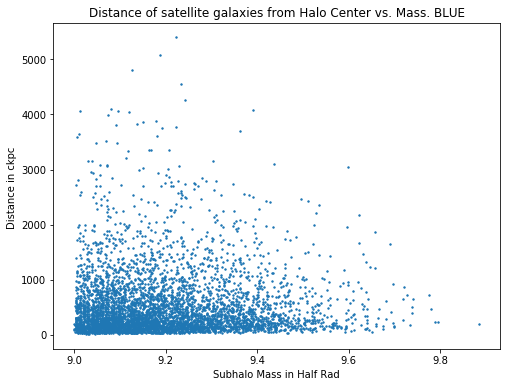

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [47]:
#Satellite galaxy distance
dist = []
mass_sat = []
mass_cen_red = []
for i in range(0, len(red_cut_mass['SubhaloGrNr'])):
    d=red_cut_mass['SubhaloPos'][i]-halo_table['GroupPos'][red_cut_mass['SubhaloGrNr'][i]]
    to_add = np.sqrt((d[0]/0.7)**2 + (d[1]/0.7)**2 +(d[2]/0.7)**2)
    if (not(to_add>10000 or to_add==0)):
        mass_sat.append(np.log10(red_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704))
        dist.append(to_add)
    elif(to_add==0):
        mass_cen_red.append(np.log10(red_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704))
plt.figure(figsize=(8,6))
plt.scatter(mass_sat, dist, s=2, color='red')
plt.xlabel("Subhalo Mass in Half Rad")
plt.ylabel("Distance in ckpc")
plt.title("Distance of satellite galaxies from Halo Center vs. Mass. RED")
plt.show()

dist = []
mass = []
mass_cen_blue = []
for i in range(0, len(blue_cut_mass['SubhaloGrNr'])):
    d=blue_cut_mass['SubhaloPos'][i]-halo_table['GroupPos'][blue_cut_mass['SubhaloGrNr'][i]]
    to_add = np.sqrt((d[0]/0.7)**2 + (d[1]/0.7)**2 +(d[2]/0.7)**2)
    if (not(to_add>10000 or to_add==0)):
        mass.append(np.log10(blue_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704))
        dist.append(to_add)
    elif(to_add==0):
        mass_cen_blue.append(np.log10(blue_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704))
plt.figure(figsize=(8,6))
plt.scatter(mass, dist, s=2)
plt.title("Distance of satellite galaxies from Halo Center vs. Mass. BLUE")
plt.xlabel("Subhalo Mass in Half Rad")
plt.ylabel("Distance in ckpc ")
plt.show()
plt.figure(figsize=(8,6))

In [ ]:
#Central Galaxy Mass Distribution
plt.title("Mass distribution of Blue and Red central galaxies")
plt.hist(mass_cen_blue, bins = 20, histtype = 'step')
plt.hist(mass_cen_red, bins = 20, histtype = 'step')   
plt.xlabel("mass")
plt.show()

In [ ]:
bmass = np.array(np.log10(blue_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
rmass = np.array(np.log10(red_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
blue_same_mass = blue_cut_mass[np.logical_and(bmass>10.6,bmass<10.9)]
red_same_mass = red_cut_mass[np.logical_and(rmass>10.6,rmass<10.9)]

plt.figure(figsize=(8,6))
plt.hist(blue_same_mass['SubhaloVmax'], bins = 20, histtype = 'step')
plt.hist(red_same_mass['SubhaloVmax'], bins = 25, histtype = 'step', color="red")   
plt.title("Distribution of max value of velocity curve, red vs blue - mass bin, 10.6 to 10.9.")
plt.xlabel("Maximum value of the spherically-averaged rotation curve. (km/s)", fontsize=16)
plt.show()

print(np.mean(np.array(np.log10(blue_same_mass["SubhaloMassInHalfRad"]*1e10/0.704))))
print(np.mean(np.array(np.log10(red_same_mass["SubhaloMassInHalfRad"]*1e10/0.704))))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


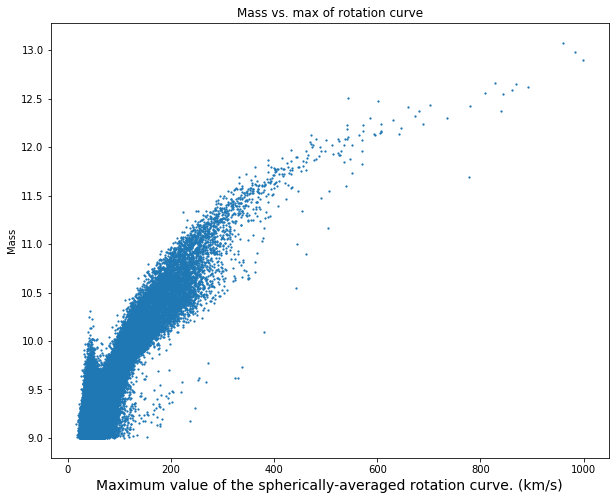

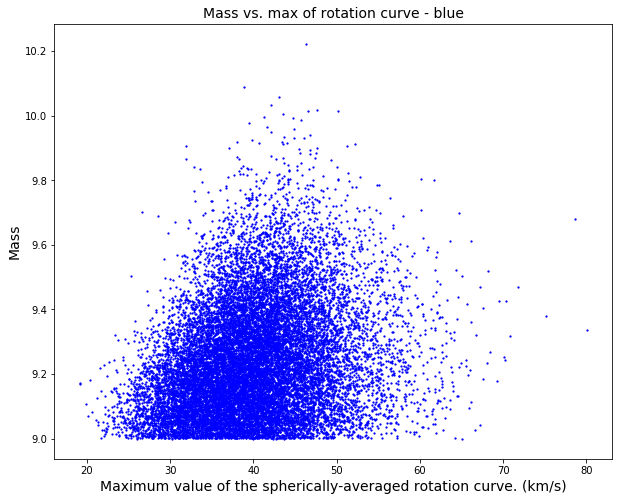

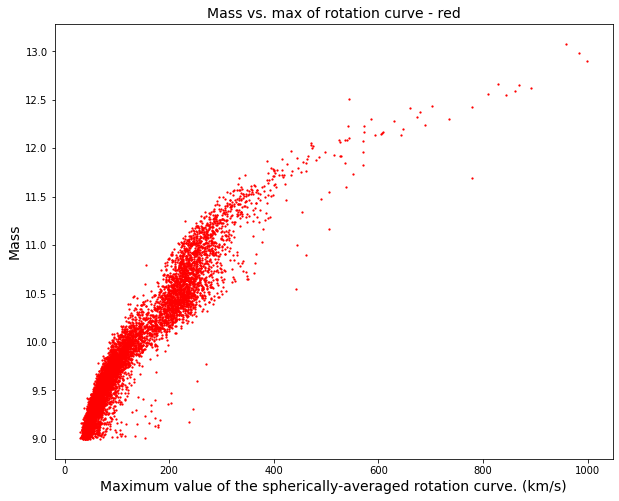

In [48]:
#Mass and rotation dependence
plt.figure(figsize=(10,8))
vtable = cut(pre_masscut, 'SubhaloMassInHalfRad', 9)
mass = (np.log10(vtable["SubhaloMassInHalfRad"]*1e10/0.704))
plt.scatter(vtable['SubhaloVmax'], mass, s=1.5)
plt.title("Mass vs. max of rotation curve")
plt.xlabel("Maximum value of the spherically-averaged rotation curve. (km/s)", fontsize=14)
plt.ylabel("Mass")
plt.show()

plt.figure(figsize=(10,8))
mass = (np.log10(blue_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
plt.scatter(blue_cut_mass['SubhaloVmax'], mass, s=1.5, color = "blue")
plt.title("Mass vs. max of rotation curve - blue", fontsize=14)
plt.xlabel("Maximum value of the spherically-averaged rotation curve. (km/s)", fontsize=14)
plt.ylabel("Mass", fontsize=14)
plt.show()

plt.figure(figsize=(10,8))
mass = (np.log10(red_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
plt.scatter(red_cut_mass['SubhaloVmax'], mass, s=1.5, color = "red")
plt.title("Mass vs. max of rotation curve - red", fontsize=14)
plt.xlabel("Maximum value of the spherically-averaged rotation curve. (km/s)", fontsize=14)
plt.ylabel("Mass", fontsize=14)
plt.show()


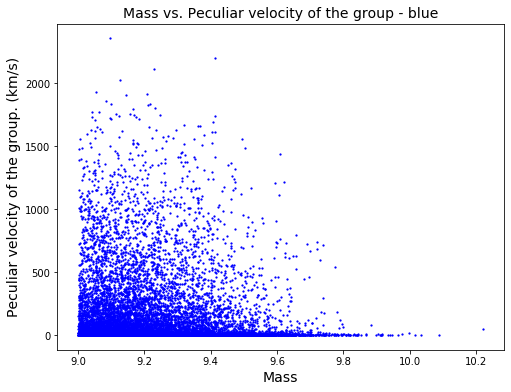

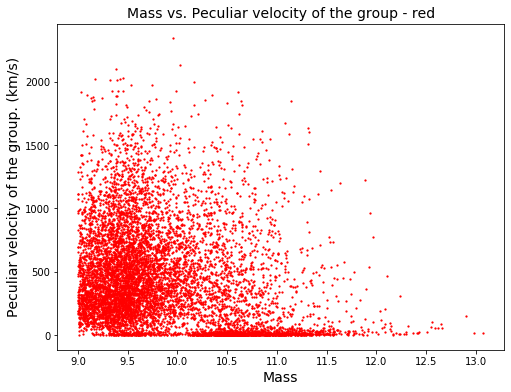

In [49]:
pec_vel_blue = []
mass_blue = []
for i in range(0, len(blue_cut_mass['SubhaloGrNr'])):
    v=blue_cut_mass['SubhaloVel'][i]-halo_table['GroupVel'][blue_cut_mass['SubhaloGrNr'][i]]/scale_factor
    to_add = np.sqrt((v[0])**2 + (v[1])**2 +(v[2])**2)
    if(to_add>1):
        pec_vel_blue.append(to_add)
        mass_blue.append((np.log10(blue_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704)))
    
pec_vel_red = []
mass_red=[]
for i in range(0, len(red_cut_mass['SubhaloGrNr'])):
    v=red_cut_mass['SubhaloVel'][i]-halo_table['GroupVel'][red_cut_mass['SubhaloGrNr'][i]]/scale_factor
    to_add = np.sqrt((v[0])**2 + (v[1])**2 +(v[2])**2)
    if(to_add>1):
        pec_vel_red.append(to_add)
        mass_red.append((np.log10(red_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704)))

plt.figure(figsize=(8,6))
plt.scatter(mass_blue,pec_vel_blue, s=1.5, color = "blue")
plt.title("Mass vs. Peculiar velocity of the group - blue", fontsize=14)
plt.ylabel("Peculiar velocity of the group. (km/s)", fontsize=14)
plt.xlabel("Mass", fontsize=14)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(mass_red,pec_vel_red, s=1.5, color = "red")
plt.title("Mass vs. Peculiar velocity of the group - red", fontsize=14)
plt.ylabel("Peculiar velocity of the group. (km/s)", fontsize=14)
plt.xlabel("Mass", fontsize=14)
plt.show()

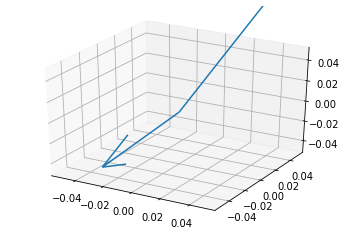

In [115]:
from mpl_toolkits.mplot3d import Axes3D


p0 = blue_cut_mass['SubhaloVel'][0]
p1 = halo_table['GroupVel'][blue_cut_mass['SubhaloGrNr'][0]]/scale_factor

X=[0,0]
Y=[0,0]
Z=[0,0]
U=list([p0[0],p1[0]])
V=list([p0[1],p1[1]])
W=list([p0[2],p1[2]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X,Y,Z,U,V,W, length=0.001)#, normalize=True)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


p0 = blue_cut_mass['SubhaloVel'][0]
p1 = halo_table['GroupVel'][blue_cut_mass['SubhaloGrNr'][i]]/scale_factor

X=[0]
Y=[0]
Z=[0]
U=[1]
V=[1]
W=[1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.quiver(X,Y,Z,U,V,W, length=0.1, normalize=True)
plt.show()